# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

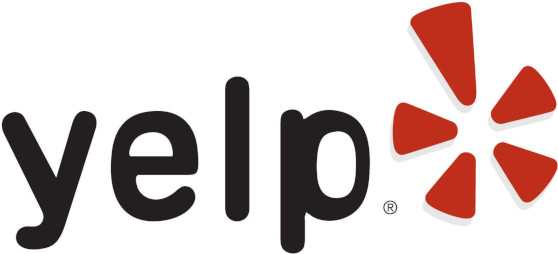

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.* 

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [3]:
data = pd.read_csv('./yelp_business.csv', parse_dates=[0])
data.head()

C:\Users\Micor\AppData\Local\Temp\ipykernel_10628\4186944067.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('./yelp_business.csv', parse_dates=[0])


,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [4]:
data['city'] = data['city'].apply(lambda x: str(x).lower())
data['city'].value_counts().head()

city
las vegas     26809
phoenix       17213
toronto       17211
charlotte      8554
scottsdale     8228
Name: count, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [5]:
data[(data['city']=='las vegas')].head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
6,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",las vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",las vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
26,26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",las vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services
41,41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",las vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...
48,48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",las vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping


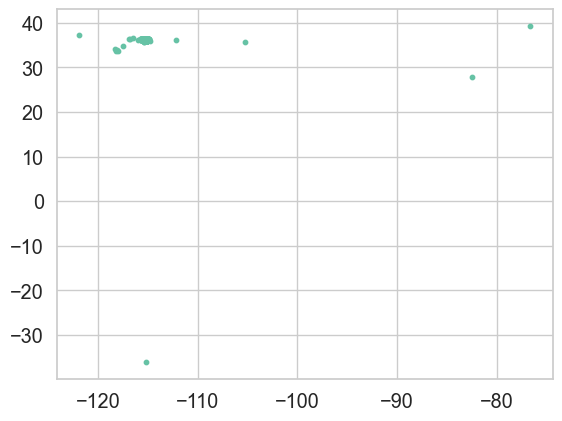

In [6]:
X_y_name = data[data['city'] == 'las vegas']
X_y_name = X_y_name[['name', 'latitude', 'longitude']]

plt.scatter(X_y_name['longitude'], X_y_name['latitude'], s=10)
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

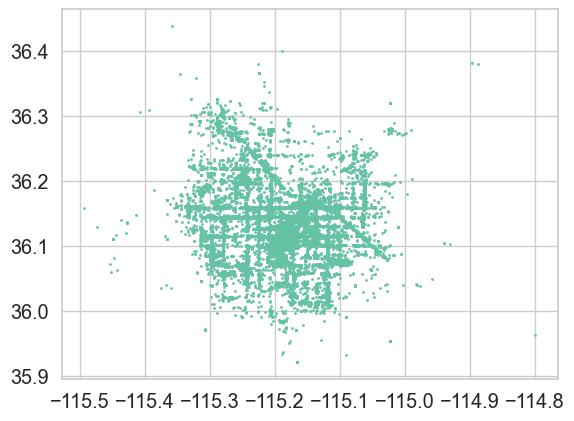

In [7]:
X_y_name = X_y_name[(X_y_name['longitude'] < -114) & (X_y_name['longitude'] > -115.5) & (X_y_name['latitude'] > 35.8)]

plt.scatter(X_y_name['longitude'], X_y_name['latitude'], s=1)
plt.show()

In [8]:
X_y_name

,name,latitude,longitude
6,"""BDJ Realty""",36.207430,-115.268460
7,"""Soccer Zone""",36.197484,-115.249660
26,"""Alfredo's Jewelry""",36.085051,-115.119421
41,"""Task Electric""",36.056382,-115.269332
48,"""Star Nursery""",36.105196,-115.056880
...,...,...,...
174539,"""Stonegate Real Estate Services""",36.134355,-115.224462
174545,"""Starbucks""",36.173589,-115.116779
174546,"""Sprint Store""",36.055130,-115.243488
174552,"""9 Dragons Fight Shop""",36.128780,-115.208990


Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [9]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [10]:
X_y_name[['latitude', 'longitude']].shape

(26761, 2)

In [11]:
import folium
map = folium.Map(location=[36.175, -115.137], zoom_start = 11)

for coordinates in X_y_name.values.tolist()[:1000]:
    folium.Marker(location=coordinates[1:], popup = coordinates[0], icon=folium.Icon(color = 'green')).add_to(map)
map.save("map1.html")

Отметил только первую тысячу, иначе слишком перегружено; Сохранено в файле map1

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [12]:
data2 = pd.read_csv('./yelp_review.csv', parse_dates=[0])
data2.head()

C:\Users\Micor\AppData\Local\Temp\ipykernel_10628\2460085861.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2 = pd.read_csv('./yelp_review.csv', parse_dates=[0])


,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [13]:
data[data['city']=='las vegas']['business_id'].values.tolist()
data2

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...,...
5261663,5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,5261666,EO3i5kTUG7_S2OIQ23sdSA,3


In [14]:
data2 = data2.loc[data2['business_id'].isin(data[data['city']=='las vegas']['business_id'].values.tolist())]

In [15]:
data2

,Unnamed: 0,business_id,stars
5,5,8QWPlVQ6D-OExqXoaD2Z1g,5
87,87,pLZ9oZM8c6MNbRlg06lBPg,1
105,105,6Q7-wkCPc1KF75jZLOTcMw,2
122,122,9Jc3W0aR9Xf2gcHI0rEXsw,1
123,123,xVEtGucSRLk5pxxN0t4i6g,5
...,...,...,...
5261633,5261633,Q7m8G4579-XYKV3LMW8V7g,4
5261634,5261634,3kdSl5mo9dWC4clrQjEDGg,5
5261635,5261635,lLMJsTchKYF1O0fpNWpCRA,5
5261639,5261639,UicG-oyX4bjmcQbmXn7hGw,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [16]:
data3 = data2.groupby('business_id')['stars'].aggregate([np.mean, np.size])

In [17]:
data3

,mean,size
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


В следующем блоке шаманство для красивого вида(сделал 'business_id' не index, а обычным столбцом)

In [18]:
data3_size = pd.DataFrame({'business_id':data3['size'].index, 'size':data3['size'].values})
data3_mean = pd.DataFrame({'business_id':data3['mean'].index, 'mean':data3['mean'].values})
data3_mean = data3_mean.join(data3_size, rsuffix='_clone')
data3 = data3_mean.drop('business_id_clone', axis=1)
data3

,business_id,mean,size
0,--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
1,--DdmeR16TRb3LsjG0ejrQ,3.200000,5
2,--WsruI0IGEoeRmkErU5Gg,4.928571,14
3,--Y7NhBKzLTbNliMUX_wfg,4.875000,8
4,--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...,...
26804,zzOo9n22fBbKAhbSpMzggA,3.230769,26
26805,zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
26806,zzjqFOujmM9surbMANZ_ag,5.000000,3
26807,zzsKbL1KMNJqazSqBXskxQ,3.666667,6


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [19]:
data3 = data3.rename(columns={'mean':'average rating', 'size':'number of reviews'})
data3

,business_id,average rating,number of reviews
0,--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
1,--DdmeR16TRb3LsjG0ejrQ,3.200000,5
2,--WsruI0IGEoeRmkErU5Gg,4.928571,14
3,--Y7NhBKzLTbNliMUX_wfg,4.875000,8
4,--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...,...
26804,zzOo9n22fBbKAhbSpMzggA,3.230769,26
26805,zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
26806,zzjqFOujmM9surbMANZ_ag,5.000000,3
26807,zzsKbL1KMNJqazSqBXskxQ,3.666667,6


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [20]:
data4 = data[data['city']=='las vegas'][['business_id', 'latitude', 'longitude', 'categories', 'name']]
data4.head()

,business_id,latitude,longitude,categories,name
6,kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty"""
7,OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone"""
26,VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry"""
41,1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric"""
48,DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery"""


In [21]:
data3 = data3.set_index('business_id')
data4 = data4.set_index('business_id')
data3 = data3.join(data4)

In [23]:
data3 = data3[(data3['longitude'] < -114) & (data3['longitude'] > -115.5) & (data3['latitude'] > 35.8)]

In [24]:
data3

,average rating,number of reviews,latitude,longitude,categories,name
business_id,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451,36.123183,-115.169190,Cajun/Creole;Steakhouses;Restaurants,"""Delmonico Steakhouse"""
--DdmeR16TRb3LsjG0ejrQ,3.200000,5,36.114277,-115.170975,Arts & Entertainment;Festivals,"""World Food Championships"""
--WsruI0IGEoeRmkErU5Gg,4.928571,14,36.130899,-115.190785,Carpet Cleaning;Local Services,"""Dial Carpet Cleaning"""
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,36.061235,-115.289685,Drywall Installation & Repair;Handyman;Home Se...,"""Pinnacle Restoration"""
--e8PjCNhEz32pprnPhCwQ,3.473684,19,36.158851,-115.133272,Pets;Pet Groomers;Pet Services;Pet Stores,"""Lucky's Pet Grooming & Boutique"""
...,...,...,...,...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26,36.099328,-115.128494,Dance Clubs;Gay Bars;Nightlife;Bars,"""Goodtimes Bar & Nightclub"""
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4,36.055602,-115.118218,Spray Tanning;Beauty & Spas;Tanning,"""Sin City Spray Tans"""
zzjqFOujmM9surbMANZ_ag,5.000000,3,36.129838,-115.146037,Nightlife;Lounges;Bars,"""American Express Open Business Lounge"""


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [25]:
import folium
map = folium.Map(location=[36.175, -115.137], zoom_start = 11)

for coordinates in data3.values.tolist()[:1000]:
    if coordinates[0] <= 2.5:
        folium.Marker(location=coordinates[2:4], popup = coordinates[5], icon=folium.Icon(color = 'red'), radius=1, opacity=0.3).add_to(map)
    elif coordinates[0] <= 3.5:
        folium.Marker(location=coordinates[2:4], popup = coordinates[5], icon=folium.Icon(color = 'orange'), opacity=0.3).add_to(map)
    else:
        folium.Marker(location=coordinates[2:4], popup = coordinates[5], icon=folium.Icon(color = 'green'), opacity=0.3).add_to(map)
map.save("map2.html")


Отметил только первую тысячу, иначе слишком перегружено

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [26]:
data3

,average rating,number of reviews,latitude,longitude,categories,name
business_id,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451,36.123183,-115.169190,Cajun/Creole;Steakhouses;Restaurants,"""Delmonico Steakhouse"""
--DdmeR16TRb3LsjG0ejrQ,3.200000,5,36.114277,-115.170975,Arts & Entertainment;Festivals,"""World Food Championships"""
--WsruI0IGEoeRmkErU5Gg,4.928571,14,36.130899,-115.190785,Carpet Cleaning;Local Services,"""Dial Carpet Cleaning"""
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,36.061235,-115.289685,Drywall Installation & Repair;Handyman;Home Se...,"""Pinnacle Restoration"""
--e8PjCNhEz32pprnPhCwQ,3.473684,19,36.158851,-115.133272,Pets;Pet Groomers;Pet Services;Pet Stores,"""Lucky's Pet Grooming & Boutique"""
...,...,...,...,...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26,36.099328,-115.128494,Dance Clubs;Gay Bars;Nightlife;Bars,"""Goodtimes Bar & Nightclub"""
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4,36.055602,-115.118218,Spray Tanning;Beauty & Spas;Tanning,"""Sin City Spray Tans"""
zzjqFOujmM9surbMANZ_ag,5.000000,3,36.129838,-115.146037,Nightlife;Lounges;Bars,"""American Express Open Business Lounge"""


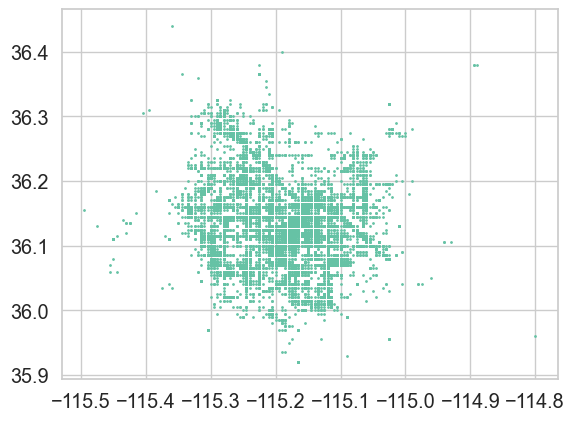

In [27]:
data4 = data3.copy()
scale = 20
data4[['latitude', 'longitude']] = data4[['latitude', 'longitude']].apply(lambda x: np.round(x * scale, decimals=1) / scale)
plt.scatter(data4['longitude'], data4['latitude'], s=1)   

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

*Ответ на замечание*. Eсли брать среднее по всем компаниям, то вес оценки будет зависеть от количества компаний. Лучше брать среднее по компаниям.

<Axes: xlabel='longitude', ylabel='latitude'>

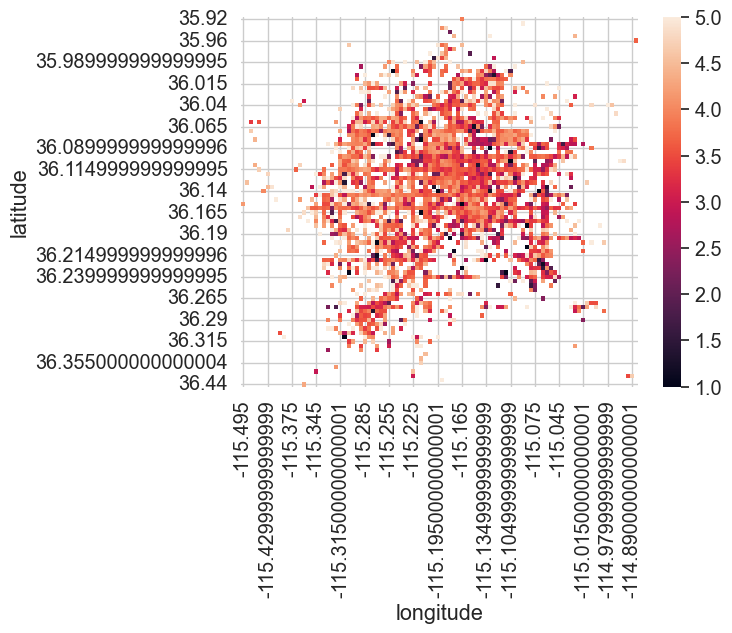

In [28]:
data5 = data4.pivot_table(index='latitude', columns="longitude",  values='average rating', aggfunc=np.mean)
sns.heatmap(data5)

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <При малом количестве компаний в районе, оценка может резко меняться при появлении новой или при выборе немного других границ районов. Из-за плохо подобранной цветовой гаммы не понятна разница между 5 и 2>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

Ограничил сначало по 'latitude' 30 вхождений потом по 'longitude'. К сожалению с 30 плохо видны изменния, но сделал как по заданию

In [29]:
counts = data4['latitude'].value_counts()
data4 = data4[data4['latitude'].isin(counts[counts > 30].index)]
counts = data4['longitude'].value_counts()
data4 = data4[data4['longitude'].isin(counts[counts > 30].index)]

В блоке ниже просто проверил, что всё же что-то поменялось(в прошлом shape был (27###, 2)

In [30]:
data4.shape

(26405, 6)

<Axes: xlabel='longitude', ylabel='latitude'>

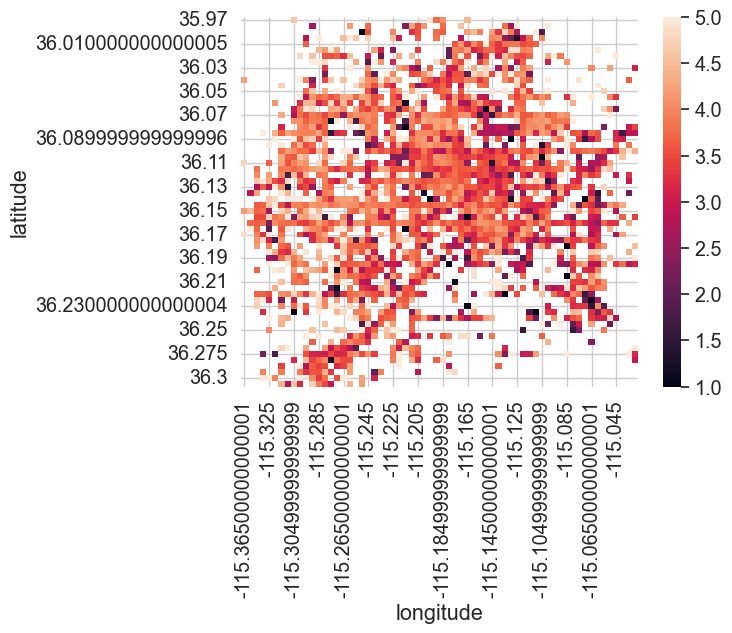

In [31]:
data4 = data4.pivot_table(index='latitude', columns="longitude",  values='average rating', aggfunc=np.mean)
sns.heatmap(data4, vmin=1, vmax=5)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <Пропали оценки по краям, в центре сильных изменений не наблюдается. Возможно это из-за того, что районы слишком большие, но при размерах меньших в 10-100(scale=100-1000) раз график плохо читается.>

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

Всё аналогично коду ранее

In [32]:
data3 = data[data['city']=='las vegas']
data3 = data3.set_index('business_id')
counts = data2['business_id'].value_counts()
data4 = data2[data2['business_id'].isin(counts[counts >= 5].index)]
data4 = data4.groupby('business_id')['stars'].aggregate([np.mean, np.size])
data3 = data3.join(data4)

In [33]:
data4 = data3[(data3['categories'].str.contains('Restaurant'))].copy()
scale = 20
data4[['latitude', 'longitude']] = data4[['latitude', 'longitude']].apply(lambda x: np.round(x * scale, decimals=1) / scale)
counts = data4['latitude'].value_counts()
data4 = data4[data4['latitude'].isin(counts[counts >= 10].index)]
counts = data4['longitude'].value_counts()
data4 = data4[data4['longitude'].isin(counts[counts >= 10].index)]
data4

,Unnamed: 0,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,mean,size
business_id,,,,,,,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,52,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",las vegas,NV,89119,36.065,-115.170,1,Nightlife;Bars;Barbeque;Sports Bars;American (...,3.769231,13.0
4srfPk1s8nlm1YusyDUbjg,53,"""Subway""",Southeast,"""6889 S Eastern Ave, Ste 101""",las vegas,NV,89119,36.065,-115.120,1,Fast Food;Restaurants;Sandwiches,2.666667,6.0
n7V4cD-KqqE3OXk0irJTyA,54,"""GameWorks""",Southeast,"""6587 Las Vegas Blvd S, Ste 171""",las vegas,NV,89119,36.070,-115.180,1,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.117479,349.0
F0fEKpTk7gAmuSFI0KW1eQ,91,"""Cafe Mastrioni""",Spring Valley,"""4250 S Rainbow Blvd, Ste 1007""",las vegas,NV,89103,36.110,-115.240,0,Italian;Restaurants,NaN,NaN
Wpt0sFHcPtV5MO9He7yMKQ,122,"""McDonald's""",Eastside,"""3020 E Desert Inn Rd""",las vegas,NV,89121,36.130,-115.110,1,Restaurants;Fast Food;Burgers,2.150000,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kbbm6Vd5UdbP10dwjBghRw,174415,"""In-N-Out Burger""",Southwest,"""3882 Blue Diamond Rd""",las vegas,NV,89139,36.040,-115.190,1,Restaurants;Fast Food;Burgers,4.196078,255.0
UpW3jyJ3_kTG7oDSflwnMA,174427,"""Archi's Thai Kitchen""",NaN,"""6360 W Flamingo Rd""",las vegas,NV,89103,36.115,-115.230,1,Restaurants;Thai,3.994695,377.0
e2ApirIzYID9xIye0r_gKQ,174451,"""Farmer Boys""",Centennial,"""7791 W Tropical Pkwy""",las vegas,NV,89149,36.270,-115.265,1,Salad;Breakfast & Brunch;Sandwiches;Burgers;Re...,2.735955,178.0


<Axes: xlabel='longitude', ylabel='latitude'>

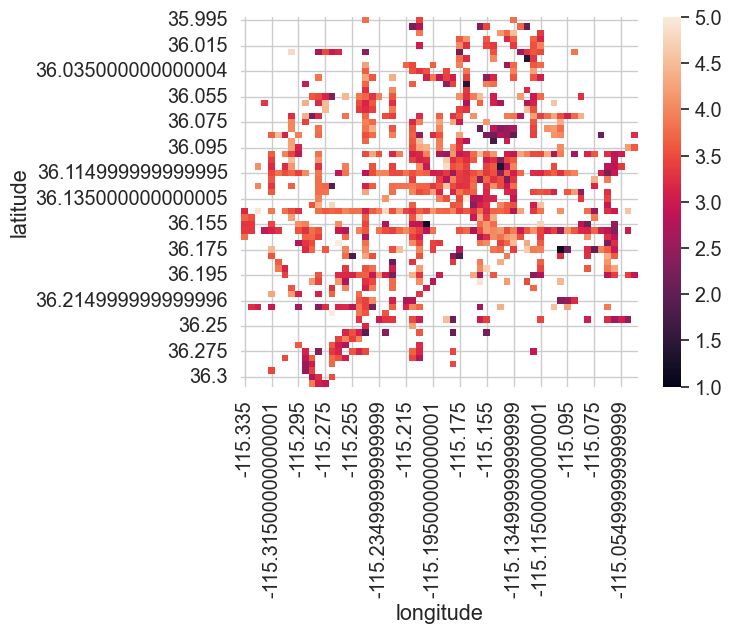

In [34]:
data5 = data4.pivot_table(index='latitude', columns="longitude",  values='mean', aggfunc=np.mean)
sns.heatmap(data5, vmin=1, vmax=5)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <Ограничения снизу повышают прочность(вероятность достоверности) отзыва>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [35]:
data3 = data[data['city']=='las vegas']
data3 = data3.set_index('business_id')
counts = data2['business_id'].value_counts()
data4 = data2[data2['business_id'].isin(counts[counts >= 50].index)]
data4 = data4.groupby('business_id')['stars'].aggregate([np.mean, np.size])
data3 = data3.join(data4)
data4 = data3[(data3['categories'].str.contains('Restaurant'))].copy()
data4 = data4.sort_values(by='mean', ascending=False)
data4[['name', 'mean', 'size', 'latitude', 'longitude', 'categories']].head(10)

,name,mean,size,latitude,longitude,categories
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",4.966480,179.0,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
Fmij544FE1iOruoxI41kew,"""Pepito Shack""",4.907692,65.0,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",4.890909,55.0,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",4.868132,91.0,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",4.848069,1165.0,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",4.836538,104.0,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",4.833333,180.0,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",4.816754,191.0,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",4.809524,63.0,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [36]:
data4 = data4[data4['mean']>=4.7]
data4 = data4[['name', 'latitude', 'longitude']]

In [37]:
map = folium.Map(location=[36.175, -115.137], zoom_start = 11)

for index, coordinates in enumerate(data4.values.tolist()):
    if index < 10:
        folium.Marker(location=coordinates[1:], popup = coordinates[0], icon=folium.Icon(color = 'yellow'), opacity=0.6).add_to(map)
    else:
        folium.Marker(location=coordinates[1:], popup = coordinates[0], icon=folium.Icon(color = 'green'), opacity=0.6).add_to(map)
map.save("map3.html")

C:\Users\Micor\AppData\Local\Temp\ipykernel_10628\3562902149.py:5: UserWarning: color argument of Icon should be one of: {'cadetblue', 'purple', 'darkblue', 'beige', 'darkred', 'lightblue', 'green', 'lightgray', 'darkpurple', 'red', 'white', 'orange', 'darkgreen', 'black', 'lightgreen', 'lightred', 'gray', 'blue', 'pink'}.
  folium.Marker(location=coordinates[1:], popup = coordinates[0], icon=folium.Icon(color = 'yellow'), opacity=0.6).add_to(map)


Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <Кот Василий использует только много раз проверенные данные. Поставленная задача даёт понимание о правельной обработке данных.>